In [1]:
import networkx as nx
import pandas as pd
import stellargraph as sg
import graphnets
from graphnets import gcn_pipeline, graphsage_pipeline

In [2]:
network = pd.read_csv('data/bio-pathways-network.csv')
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [3]:
multi_diseases = pd.read_csv('data/simple-single-all-proteins.csv', index_col=0)
binary_diseases = pd.read_csv('data/binary-classes.csv', index_col=0)
multi_only_diseases = pd.read_csv('data/simple-single-diseased-proteins.csv', index_col=0)

In [4]:
three_orbitals_exact = pd.read_csv('motifs location/result3.csv', index_col=0)
three_orbitals = pd.read_csv('motifs location/subsampling_3.csv', index_col=1).drop('Unnamed: 0', axis=1)
four_orbitals = pd.read_csv('motifs location/subsampling_4.csv', index_col=1).drop('Unnamed: 0', axis=1)

In [5]:
nodes = set(graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
node_multi_diseases = multi_diseases.drop(drop_rows)

In [6]:
dis_graph = nx.read_gml('networks/diseased-ppi')
dis_graph = nx.relabel_nodes(dis_graph, lambda x: int(x), copy=False)
nodes = set(dis_graph.nodes())
drop_rows = []
for n in multi_only_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
dis_nodes_multi = multi_only_diseases.drop(drop_rows)

In [7]:
motif3_exact_multi_only_diseases = dis_nodes_multi.join(three_orbitals_exact)
motif3_exact_multi_diseases = pd.concat([node_multi_diseases,three_orbitals_exact], axis=1)

motif3_multi_only_diseases = dis_nodes_multi.join(three_orbitals)
motif3_multi_diseases = pd.concat([node_multi_diseases,three_orbitals], axis=1)

motif4_multi_only_diseases = dis_nodes_multi.join(four_orbitals)
motif4_multi_diseases = pd.concat([node_multi_diseases,four_orbitals], axis=1)

**Original**

Full Network

In [8]:
G = sg.StellarGraph(graph, node_features=node_multi_diseases)

<ipython-input-8-8a30284b6d2f>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G = sg.StellarGraph(graph, node_features=node_multi_diseases)


Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 0.2265 - acc: 0.1498 - f1_m: 0.4763 - precision_m: 0.4664 - recall_m: 0.4865

Test Set Metrics:

loss: 0.2265

acc: 0.1498

f1_m: 0.4763

precision_m: 0.4664

recall_m: 0.4865


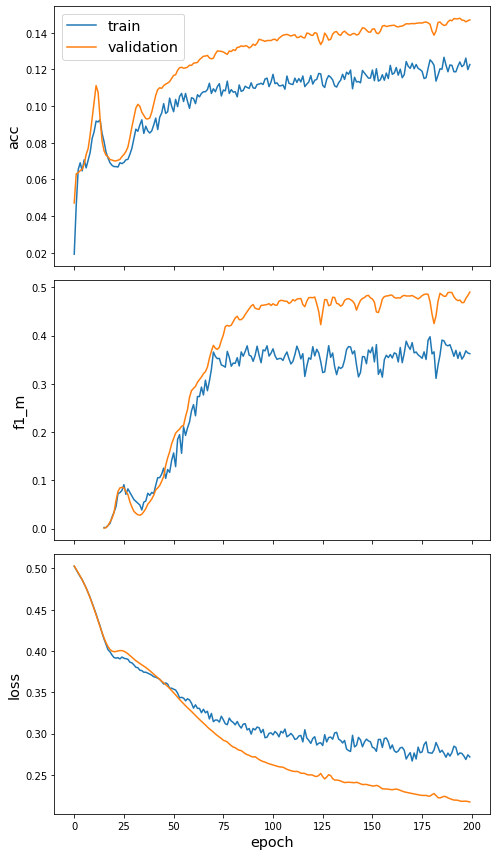

In [9]:
gcn_pipeline(G, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Training...
173/173 [==============================] - 3s 19ms/step - loss: 0.3016 - acc: 0.1827 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.3016

acc: 0.1827

f1_m: nan

precision_m: nan

recall_m: 0.0000


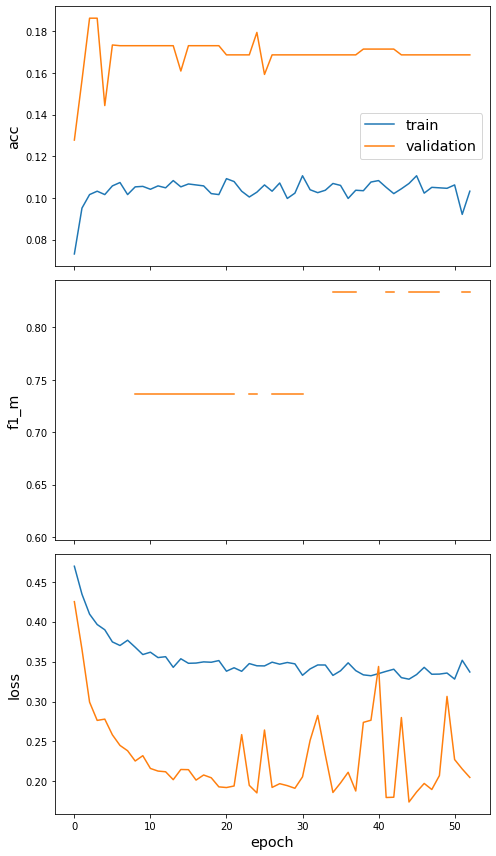

In [10]:
graphsage_pipeline(G, node_multi_diseases)

Diseased Network

In [11]:
dG = sg.StellarGraph(dis_graph, node_features=dis_nodes_multi)

<ipython-input-11-07ede7d5e95a>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG = sg.StellarGraph(dis_graph, node_features=dis_nodes_multi)


Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 1.0014 - acc: 0.5666 - f1_m: 0.4756 - precision_m: 0.7685 - recall_m: 0.3444

Test Set Metrics:

loss: 1.0014

acc: 0.5666

f1_m: 0.4756

precision_m: 0.7685

recall_m: 0.3444


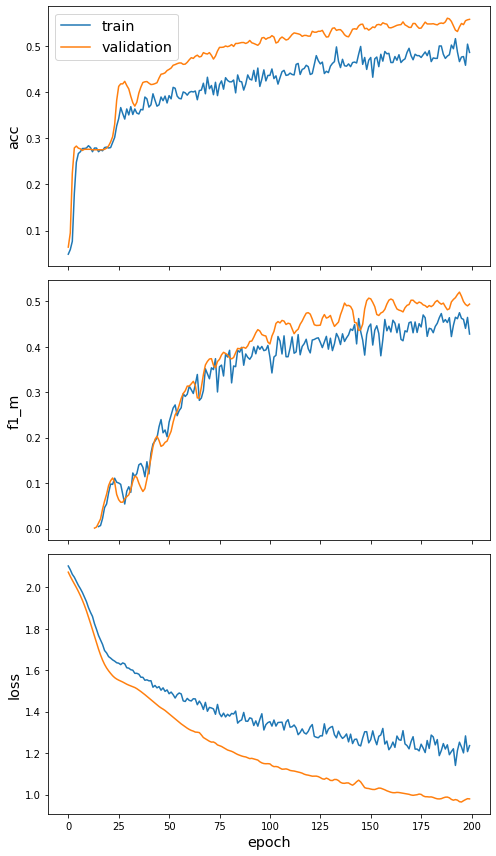

In [12]:
gcn_pipeline(dG, dis_nodes_multi, layer_sizes=[32,32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 18ms/step - loss: 0.0998 - acc: 0.8738 - f1_m: 0.9823 - precision_m: 1.0000 - recall_m: 0.9655

Test Set Metrics:

loss: 0.0998

acc: 0.8738

f1_m: 0.9823

precision_m: 1.0000

recall_m: 0.9655


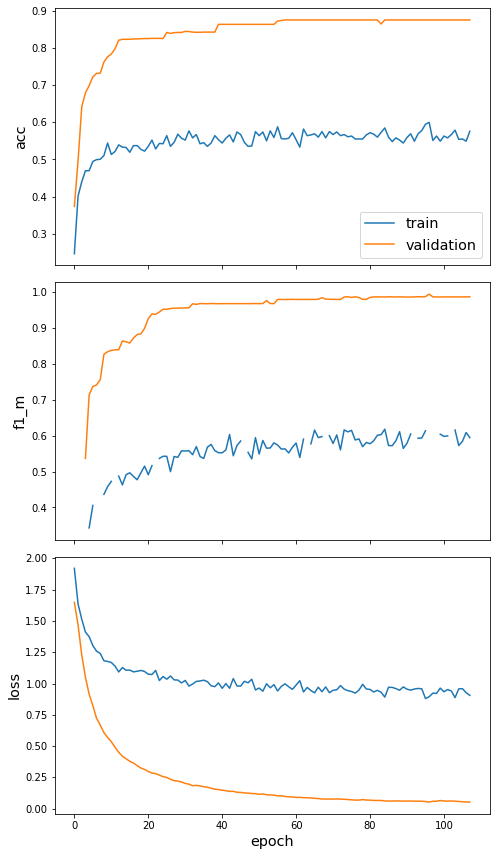

In [13]:
graphsage_pipeline(dG, dis_nodes_multi)

**3-graphlet**

*Exact*

Full Network

In [14]:
G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)
G_motif3_exact.info()

<ipython-input-14-0a379d3d880d>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 16\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.3229 - acc: 0.0090 - f1_m: 0.0149 - precision_m: 0.0091 - recall_m: 0.0420

Test Set Metrics:

loss: 3.3229

acc: 0.0090

f1_m: 0.0149

precision_m: 0.0091

recall_m: 0.0420


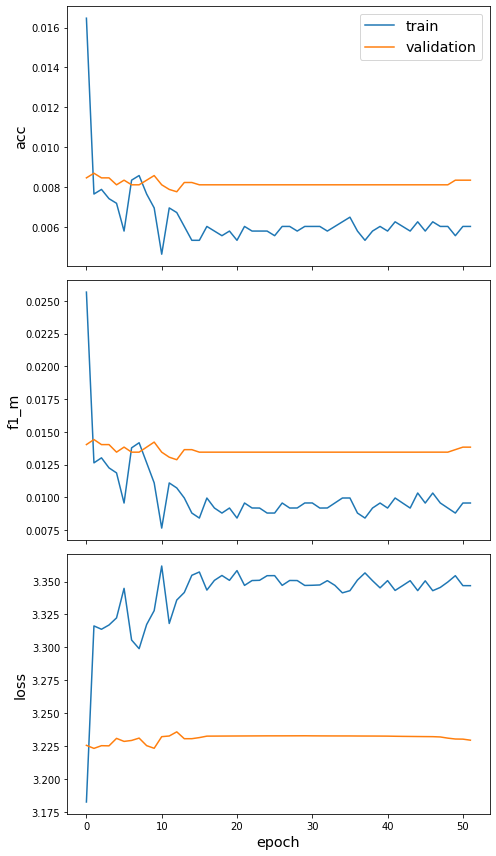

In [15]:
gcn_pipeline(G_motif3_exact, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Training...
173/173 [==============================] - 3s 19ms/step - loss: 0.4478 - acc: 0.0644 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.4478

acc: 0.0644

f1_m: nan

precision_m: nan

recall_m: 0.0000


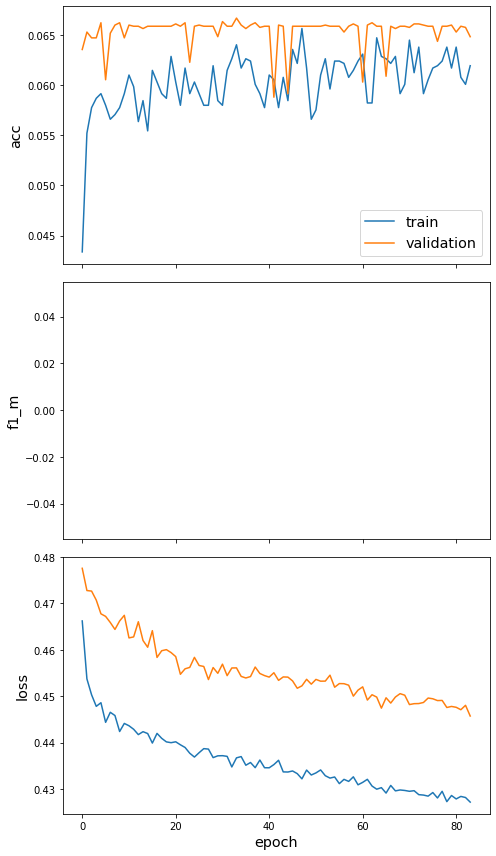

In [16]:
graphsage_pipeline(G_motif3_exact, node_multi_diseases)

Diseased Network

In [17]:
dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)
dG_motif3_exact.info()

<ipython-input-17-215c69b81a22>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 16\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 13.8620 - acc: 0.1382 - f1_m: 0.0138 - precision_m: 0.0129 - recall_m: 0.0148

Test Set Metrics:

loss: 13.8620

acc: 0.1382

f1_m: 0.0138

precision_m: 0.0129

recall_m: 0.0148


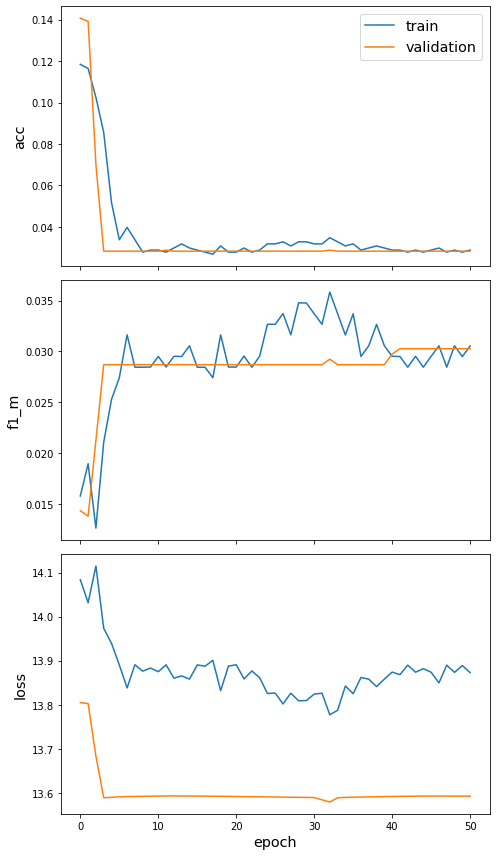

In [18]:
gcn_pipeline(dG_motif3_exact, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 1.6884 - acc: 0.2629 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6884

acc: 0.2629

f1_m: nan

precision_m: nan

recall_m: 0.0000


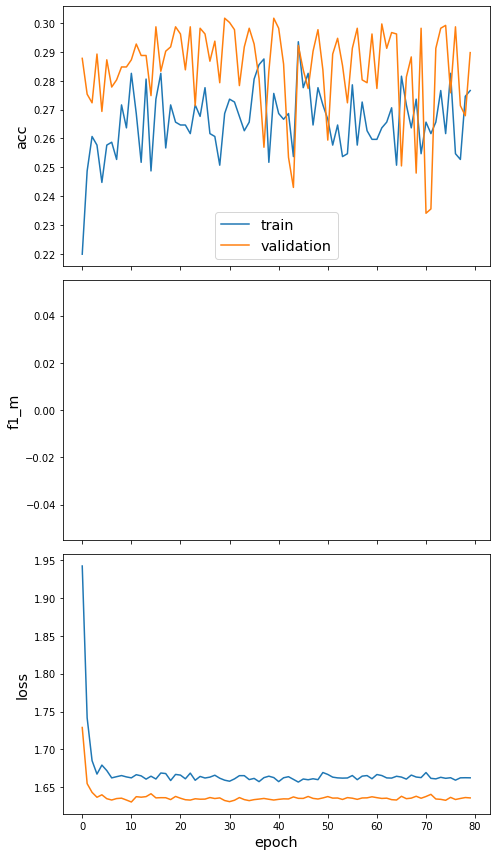

In [19]:
graphsage_pipeline(dG_motif3_exact, dis_nodes_multi)

*Subsampled*

Full Network

In [20]:
G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)
G_motif3_subsampled.info()

<ipython-input-20-40f765a525c1>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 14\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 2.4389 - acc: 0.0632 - f1_m: 0.1048 - precision_m: 0.0638 - recall_m: 0.2924

Test Set Metrics:

loss: 2.4389

acc: 0.0632

f1_m: 0.1048

precision_m: 0.0638

recall_m: 0.2924


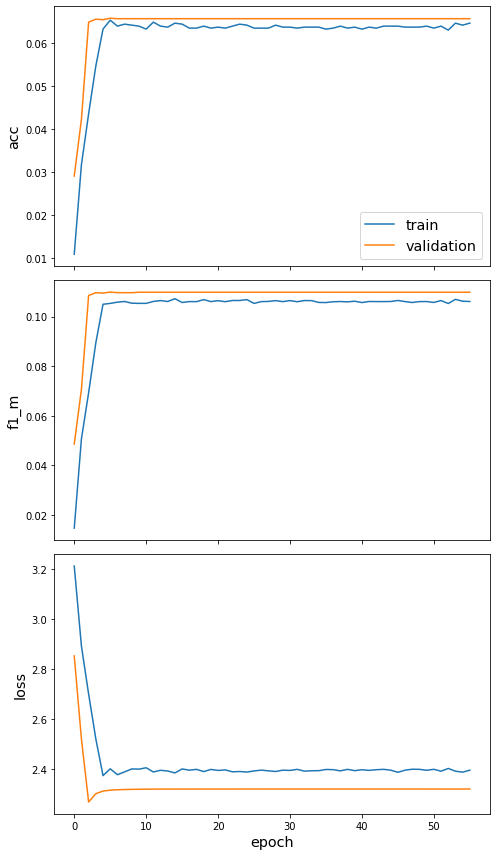

In [21]:
gcn_pipeline(G_motif3_subsampled, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Training...
173/173 [==============================] - 3s 19ms/step - loss: 0.4536 - acc: 0.0644 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.4536

acc: 0.0644

f1_m: nan

precision_m: nan

recall_m: 0.0000


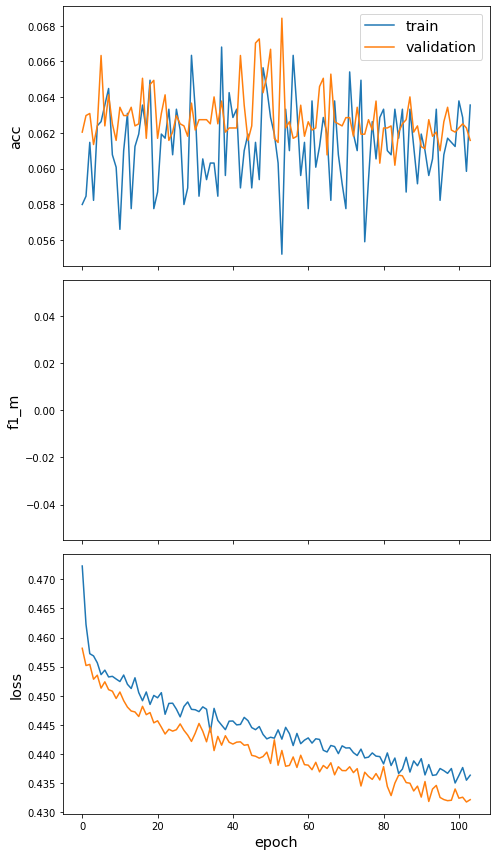

In [22]:
graphsage_pipeline(G_motif3_subsampled, node_multi_diseases)

Diseased Network

In [23]:
dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)
dG_motif3_subsampled.info()

<ipython-input-23-7f7ffa041d30>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 14\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 9.7630 - acc: 0.2699 - f1_m: 0.2862 - precision_m: 0.2691 - recall_m: 0.3058

Test Set Metrics:

loss: 9.7630

acc: 0.2699

f1_m: 0.2862

precision_m: 0.2691

recall_m: 0.3058


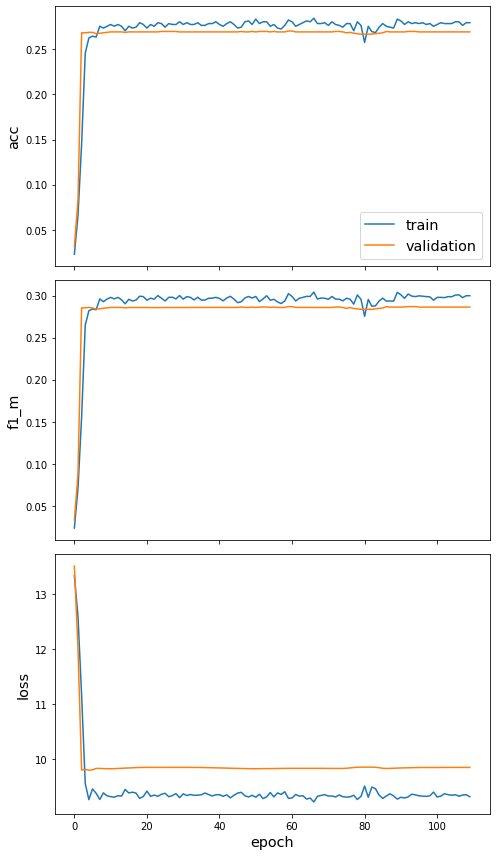

In [24]:
gcn_pipeline(dG_motif3_subsampled, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 1.6407 - acc: 0.2599 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6407

acc: 0.2599

f1_m: nan

precision_m: nan

recall_m: 0.0000


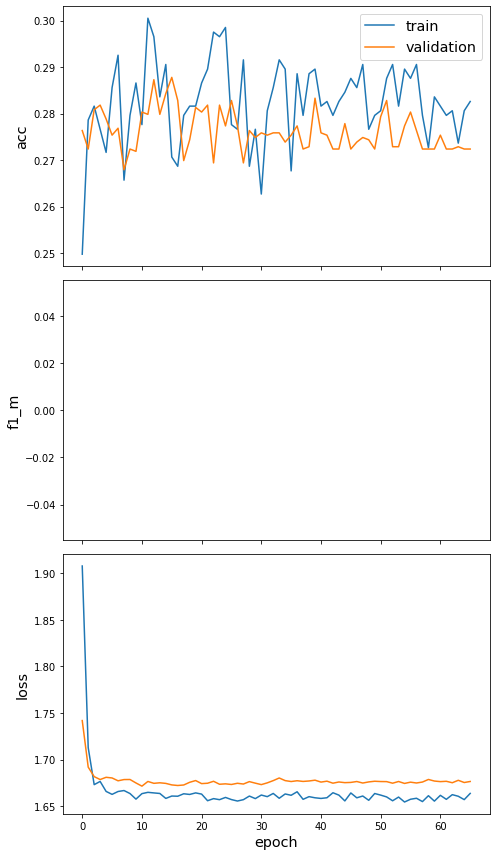

In [25]:
graphsage_pipeline(dG_motif3_subsampled, dis_nodes_multi)

**4-graphlet**

Full Network

In [26]:
G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)
G_motif4.info()

<ipython-input-26-8e6892762401>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 22\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 2.4690 - acc: 0.0598 - f1_m: 0.0988 - precision_m: 0.0600 - recall_m: 0.2801

Test Set Metrics:

loss: 2.4690

acc: 0.0598

f1_m: 0.0988

precision_m: 0.0600

recall_m: 0.2801


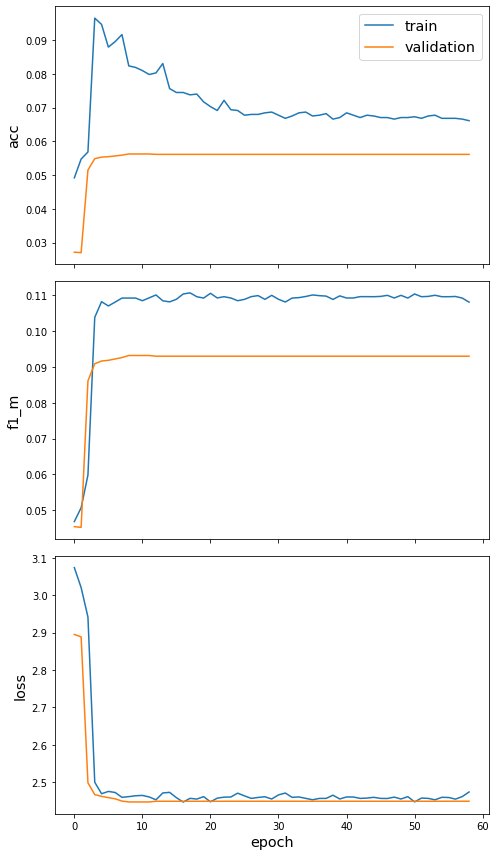

In [27]:
gcn_pipeline(G_motif4, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Training...
173/173 [==============================] - 3s 19ms/step - loss: 0.4381 - acc: 0.0641 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.4381

acc: 0.0641

f1_m: nan

precision_m: nan

recall_m: 0.0000


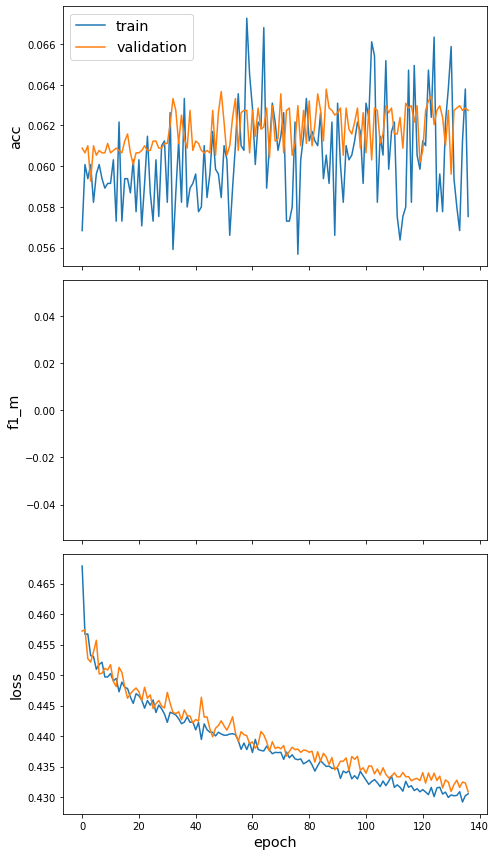

In [28]:
graphsage_pipeline(G_motif4, node_multi_diseases)

Diseased Network

In [29]:
dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)
dG_motif4.info()

<ipython-input-29-3db6296b5753>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 22\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 9.6094 - acc: 0.2763 - f1_m: 0.2942 - precision_m: 0.2760 - recall_m: 0.3150

Test Set Metrics:

loss: 9.6094

acc: 0.2763

f1_m: 0.2942

precision_m: 0.2760

recall_m: 0.3150


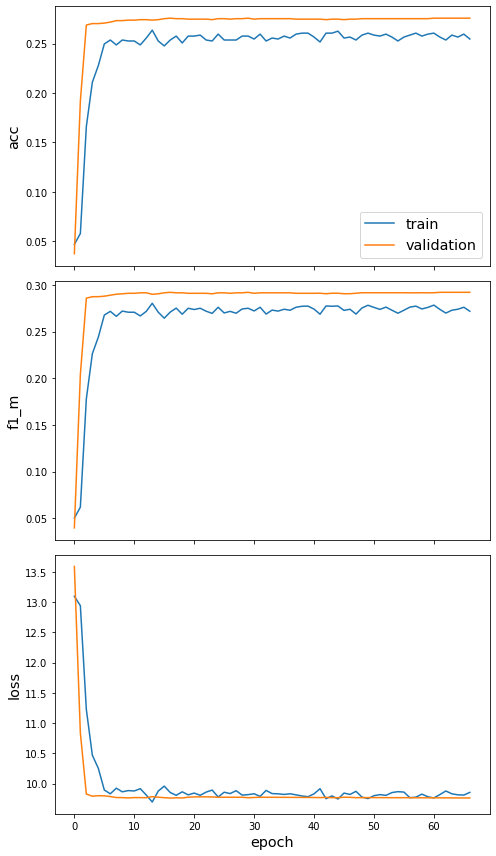

In [30]:
gcn_pipeline(dG_motif4, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 18ms/step - loss: 1.6721 - acc: 0.2679 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6721

acc: 0.2679

f1_m: nan

precision_m: nan

recall_m: 0.0000


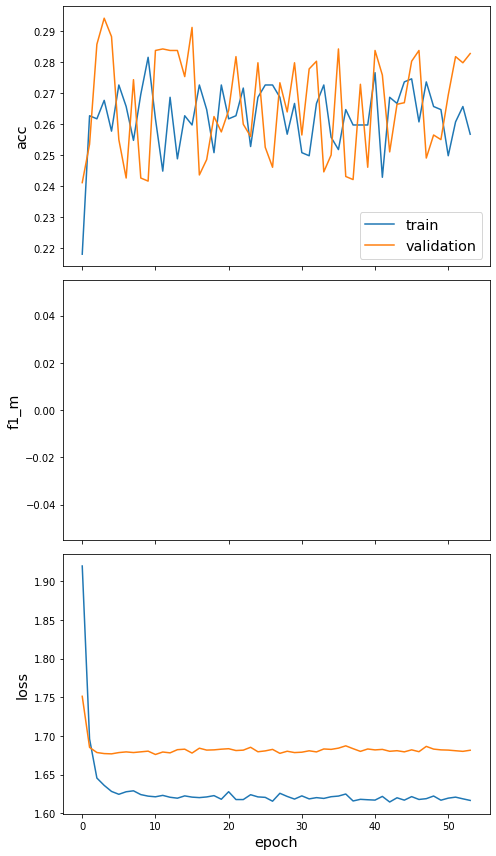

In [31]:
graphsage_pipeline(dG_motif4, dis_nodes_multi)

**Provided Orbitals**

In [32]:
motifs = pd.read_csv('data/bio-pathways-proteinmotifs.csv', index_col=0)

In [33]:
all_motifs_multi_only_diseases = dis_nodes_multi.join(motifs)
all_motifs_multi_diseases = node_multi_diseases.join(motifs)

In [34]:
G_motif_exact = sg.StellarGraph(graph, node_features=all_motifs_multi_diseases)
G_motif_exact.info()

<ipython-input-34-9eac654b7f9d>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif_exact = sg.StellarGraph(graph, node_features=all_motifs_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 84\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

In [35]:
dG_motif_exact = sg.StellarGraph(dis_graph, node_features=all_motifs_multi_only_diseases)
dG_motif_exact.info()

<ipython-input-35-d022c7c73f99>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif_exact = sg.StellarGraph(dis_graph, node_features=all_motifs_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 84\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Full Network

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.2850 - acc: 0.5945 - f1_m: 0.0052 - precision_m: 0.0031 - recall_m: 0.0151

Test Set Metrics:

loss: 3.2850

acc: 0.5945

f1_m: 0.0052

precision_m: 0.0031

recall_m: 0.0151


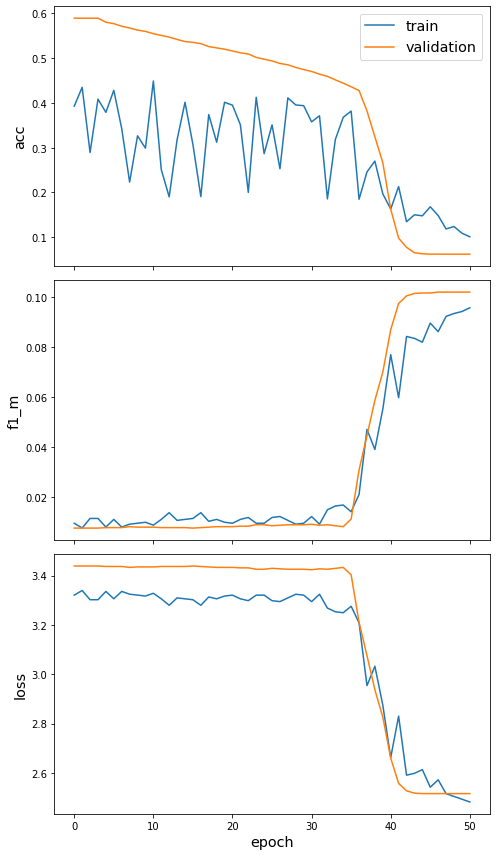

In [36]:
gcn_pipeline(G_motif_exact, node_multi_diseases)

Array shapes:
 train = (4311, 11)
 val = (8623, 11)
 test = (8623, 11)
Training...
173/173 [==============================] - 3s 20ms/step - loss: 0.4465 - acc: 0.0613 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.4465

acc: 0.0613

f1_m: nan

precision_m: nan

recall_m: 0.0000


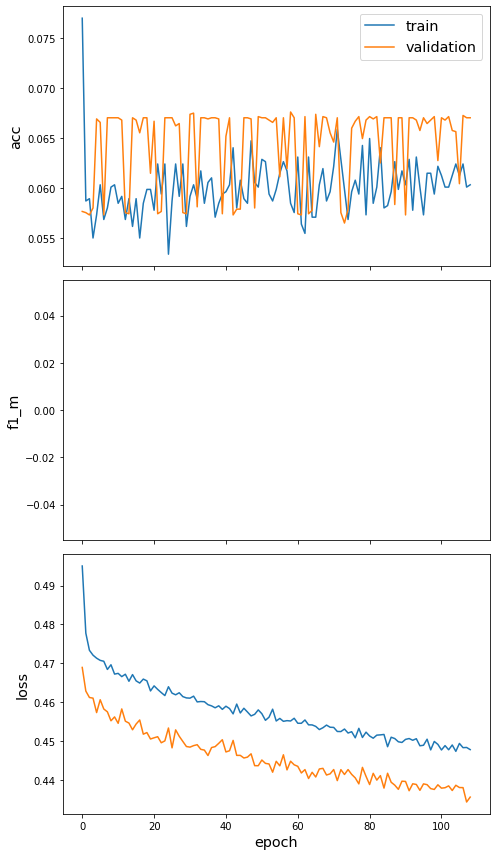

In [37]:
graphsage_pipeline(G_motif_exact, node_multi_diseases)

Diseased Network

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 13.6394 - acc: 0.0373 - f1_m: 0.0365 - precision_m: 0.0344 - recall_m: 0.0389

Test Set Metrics:

loss: 13.6394

acc: 0.0373

f1_m: 0.0365

precision_m: 0.0344

recall_m: 0.0389


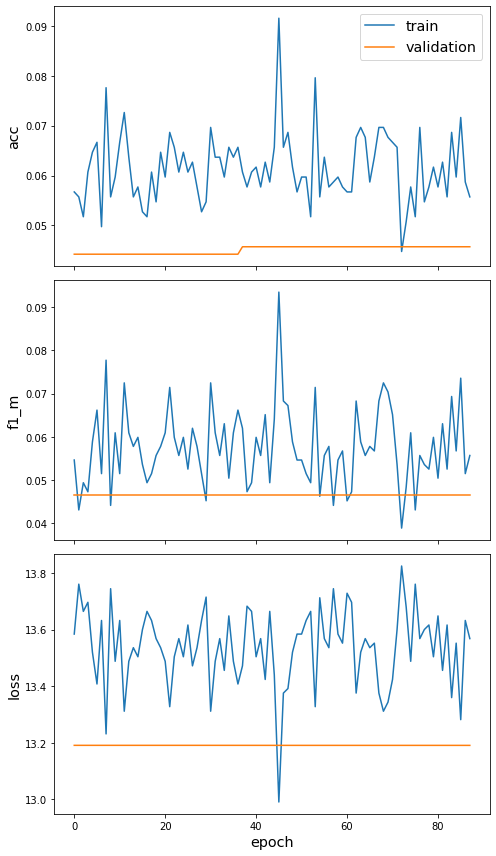

In [38]:
gcn_pipeline(dG_motif_exact, dis_nodes_multi)

In [ ]:
graphsage_pipeline(dG_motif_exact, dis_nodes_multi)

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
